# Predictive Analytics on Grade of Loan


The goal of this project is to build predictive models using Logistic and Linear Regression on a loan dataset to predict loan grades. 


## 1. Importing all the libraries required for the project

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 2. Uploading the dataset

In [3]:
data = pd.read_csv("loanDataset.csv")
data

C:\Users\Abhinandan Jain\AppData\Local\Temp\ipykernel_1144\990972709.py:1: DtypeWarning: Columns (0,19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("loanDataset.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,72663394,NaN,14400.0,14400.0,14400.0,36 months,16.29,508.33,D,D1,...,NaN,NaN,Cash,Y,May-18,COMPLETE,Apr-17,5510.0,42.58,12.0
1048571,72673678,NaN,10000.0,10000.0,10000.0,36 months,11.47,329.62,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1048572,72663353,NaN,16000.0,16000.0,16000.0,36 months,10.75,521.93,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1048573,72785737,NaN,6000.0,6000.0,6000.0,36 months,7.89,187.72,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Preprocessing

In [4]:
# Information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 1.2+ GB


In [5]:
# Missing Values
data.isna().sum()

id                             0
member_id                1048575
loan_amnt                     12
funded_amnt                   12
funded_amnt_inv               12
                          ...   
settlement_status        1029866
settlement_date          1029866
settlement_amount        1029866
settlement_percentage    1029866
settlement_term          1029866
Length: 151, dtype: int64

In [6]:
# Instead of sum , mean is the better option
data.isna().mean().sort_values()

id                                            0.000000
acc_now_delinq                                0.000011
pub_rec_bankruptcies                          0.000011
tax_liens                                     0.000011
tot_hi_cred_lim                               0.000011
                                                ...   
hardship_payoff_balance_amount                0.994171
hardship_loan_status                          0.994171
orig_projected_additional_accrued_interest    0.995344
desc                                          0.999946
member_id                                     1.000000
Length: 151, dtype: float64

In [7]:
# Dropping columns which has more than 30% missing values
data=data.drop(data.loc[:,data.isna().mean().sort_values()>0.3].columns,axis=1)
data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,72663394,14400.0,14400.0,14400.0,36 months,16.29,508.33,D,D1,Purchasing manager,...,80.0,0.0,0.0,66617.0,42230.0,28500.0,36217.0,N,Cash,Y
1048571,72673678,10000.0,10000.0,10000.0,36 months,11.47,329.62,B,B5,E6,...,50.0,0.0,0.0,297427.0,76297.0,15500.0,70097.0,N,Cash,N
1048572,72663353,16000.0,16000.0,16000.0,36 months,10.75,521.93,B,B4,Consultant,...,71.4,0.0,0.0,326583.0,54559.0,45200.0,22383.0,N,Cash,N
1048573,72785737,6000.0,6000.0,6000.0,36 months,7.89,187.72,A,A5,Administrative Assistant,...,25.0,0.0,0.0,92330.0,17595.0,13800.0,12930.0,N,Cash,N


In [8]:
# Drop rows having null values
data=data.dropna(axis=0).reset_index(drop=True)

In [9]:
# Checking if there's still any null values
data.isna().sum().sum()

0

## 4. Feature Selection

In [10]:
# Check and drop the irrelevant columns
unneeded_columns = ['id', 'sub_grade', 'emp_title', 'url', 'title', 'zip_code']
{column: list(data[column].unique()[:10]) for column in data.drop(unneeded_columns, axis=1).columns if data.dtypes[column] == 'object'}

{'term': [' 36 months', ' 60 months'],
 'grade': ['C', 'F', 'B', 'A', 'E', 'D', 'G'],
 'emp_length': ['10+ years',
  '3 years',
  '6 years',
  '1 year',
  '7 years',
  '8 years',
  '5 years',
  '2 years',
  '9 years',
  '< 1 year'],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE'],
 'verification_status': ['Not Verified', 'Source Verified', 'Verified'],
 'issue_d': ['Dec-15',
  'Nov-15',
  'Oct-15',
  'Sep-15',
  'Aug-15',
  'Jul-15',
  'Jun-15',
  'May-15',
  'Apr-15',
  'Mar-15'],
 'loan_status': ['Fully Paid',
  'Current',
  'Charged Off',
  'In Grace Period',
  'Late (31-120 days)',
  'Late (16-30 days)',
  'Default'],
 'pymnt_plan': ['n', 'y'],
 'purpose': ['debt_consolidation',
  'small_business',
  'major_purchase',
  'credit_card',
  'home_improvement',
  'house',
  'other',
  'car',
  'medical',
  'vacation'],
 'addr_state': ['PA', 'SD', 'MN', 'SC', 'RI', 'TX', 'CA', 'VA', 'AZ', 'NY'],
 'earliest_cr_line': ['Aug-03',
  'Dec-99',
  'Jun-98',
  'Jun-90',
  'Feb-99',

In [11]:
data=data.drop(unneeded_columns,axis=1)

In [12]:
# Dealing with Date features
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

for col in date_columns:
    data[[col + '_month', col + '_year']]=data[col].str.split('-',1,expand=True)
data=data.drop(date_columns,axis=1)

In [13]:
data


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,10+ years,MORTGAGE,55000.0,...,Cash,N,Dec,15,Aug,03,Jan,19,Mar,19
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,10+ years,MORTGAGE,65000.0,...,Cash,N,Dec,15,Dec,99,Jun,16,Mar,19
2,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,3 years,MORTGAGE,104433.0,...,Cash,N,Dec,15,Jun,98,Jul,16,Mar,18
3,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,10+ years,MORTGAGE,180000.0,...,Cash,N,Dec,15,Jun,90,Nov,16,Mar,19
4,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,10+ years,MORTGAGE,85000.0,...,Cash,N,Dec,15,Feb,99,Jan,17,Mar,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789571,12000.0,12000.0,12000.0,60 months,12.99,272.98,C,10+ years,OWN,41000.0,...,Cash,N,Mar,16,Mar,96,May,16,Nov,18
789572,14400.0,14400.0,14400.0,36 months,16.29,508.33,D,10+ years,RENT,45000.0,...,Cash,Y,Feb,16,Nov,03,Sep,16,Aug,18
789573,10000.0,10000.0,10000.0,36 months,11.47,329.62,B,10+ years,MORTGAGE,135000.0,...,Cash,N,Feb,16,Oct,03,Jan,19,Jan,19
789574,16000.0,16000.0,16000.0,36 months,10.75,521.93,B,< 1 year,MORTGAGE,70000.0,...,Cash,N,Feb,16,May,90,Nov,18,Mar,19


## 5. Encoding the data

In [14]:
#  Encode categorical data i.e month into numbers
month_ordering = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for col in date_columns:
    data[col + '_month'] = data[col + '_month'].apply(lambda x: month_ordering.index(x))
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,10+ years,MORTGAGE,55000.0,...,Cash,N,11,15,7,03,0,19,2,19
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,10+ years,MORTGAGE,65000.0,...,Cash,N,11,15,11,99,5,16,2,19
2,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,3 years,MORTGAGE,104433.0,...,Cash,N,11,15,5,98,6,16,2,18
3,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,10+ years,MORTGAGE,180000.0,...,Cash,N,11,15,5,90,10,16,2,19
4,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,10+ years,MORTGAGE,85000.0,...,Cash,N,11,15,1,99,0,17,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789571,12000.0,12000.0,12000.0,60 months,12.99,272.98,C,10+ years,OWN,41000.0,...,Cash,N,2,16,2,96,4,16,10,18
789572,14400.0,14400.0,14400.0,36 months,16.29,508.33,D,10+ years,RENT,45000.0,...,Cash,Y,1,16,10,03,8,16,7,18
789573,10000.0,10000.0,10000.0,36 months,11.47,329.62,B,10+ years,MORTGAGE,135000.0,...,Cash,N,1,16,9,03,0,19,0,19
789574,16000.0,16000.0,16000.0,36 months,10.75,521.93,B,< 1 year,MORTGAGE,70000.0,...,Cash,N,1,16,4,90,10,18,2,19


In [15]:
# Convert 'year' column into float
for col in data.columns:
    try:
        data[col] = data[col].astype(float)
    except:
        pass

In [16]:
# Get columns whose datatype is object
{column: list(data[column].unique()[:10]) for column in data.columns if data.dtypes[column] == 'object'}

{'term': [' 36 months', ' 60 months'],
 'grade': ['C', 'F', 'B', 'A', 'E', 'D', 'G'],
 'emp_length': ['10+ years',
  '3 years',
  '6 years',
  '1 year',
  '7 years',
  '8 years',
  '5 years',
  '2 years',
  '9 years',
  '< 1 year'],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE'],
 'verification_status': ['Not Verified', 'Source Verified', 'Verified'],
 'loan_status': ['Fully Paid',
  'Current',
  'Charged Off',
  'In Grace Period',
  'Late (31-120 days)',
  'Late (16-30 days)',
  'Default'],
 'pymnt_plan': ['n', 'y'],
 'purpose': ['debt_consolidation',
  'small_business',
  'major_purchase',
  'credit_card',
  'home_improvement',
  'house',
  'other',
  'car',
  'medical',
  'vacation'],
 'addr_state': ['PA', 'SD', 'MN', 'SC', 'RI', 'TX', 'CA', 'VA', 'AZ', 'NY'],
 'initial_list_status': ['w', 'f'],
 'application_type': ['Individual', 'Joint App'],
 'hardship_flag': ['N', 'Y'],
 'disbursement_method': ['Cash', 'DirectPay'],
 'debt_settlement_flag': ['N', 'Y']}

In [17]:
# Classify those columns into binary, ordinal or nominal
target = 'grade'

binary_features = ['term', 'pymnt_plan', 'initial_list_status', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']
binary_positives = [' 60 months', 'y', 'w', 'Individual', 'Y', 'Cash', 'Y']

ordinal_features = ['emp_length']
emp_ordering = [
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'
]

nominal_features = ['home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']

In [18]:
# Encoding functions
def binary_encode(df, col, positive_value):
    df[col] = df[col].apply(lambda x: 1 if x == positive_value else 0)

def ordinal_encode(df, col, ordering):
    df[col] = df[col].apply(lambda x: ordering.index(x))

def onehot_encode(df, col):
    dummies = pd.get_dummies(df[col])
    df_new = pd.concat([df, dummies], axis=1)
    df_new = df_new.drop(col, axis=1)
    return df_new

In [19]:
# Perform encoding
for feature, positive_value in zip(binary_features, binary_positives):
    binary_encode(data, feature, positive_value)

ordinal_encode(data, 'emp_length', emp_ordering)

for feature in nominal_features:
    data = onehot_encode(data, feature)

In [20]:
# Check only 1 column i.e target is object datatype
(data.dtypes=='object').sum()

1

In [21]:
# Count values of each grade
data[target].value_counts()

C    232913
B    223838
A    154117
D    109002
E     49855
F     14819
G      5032
Name: grade, dtype: int64

In [22]:
# Encode Label column
label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])

target_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}
target_mappings

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'}

In [32]:
data


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,pymnt_plan,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,3600.0,3600.0,3600.0,0,13.99,123.03,2,10,55000.0,0,...,0,0,0,0,0,0,0,0,0,0
1,24700.0,24700.0,24700.0,0,11.99,820.28,2,10,65000.0,0,...,1,0,0,0,0,0,0,0,0,0
2,10400.0,10400.0,10400.0,1,22.45,289.91,5,3,104433.0,0,...,0,0,0,0,0,0,0,0,0,0
3,20000.0,20000.0,20000.0,0,9.17,637.58,1,10,180000.0,0,...,0,0,0,0,0,0,0,0,0,0
4,20000.0,20000.0,20000.0,0,8.49,631.26,1,10,85000.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789571,12000.0,12000.0,12000.0,1,12.99,272.98,2,10,41000.0,0,...,0,0,0,0,0,0,0,0,0,0
789572,14400.0,14400.0,14400.0,0,16.29,508.33,3,10,45000.0,0,...,0,0,0,0,0,0,0,0,0,0
789573,10000.0,10000.0,10000.0,0,11.47,329.62,1,10,135000.0,0,...,0,0,0,0,0,0,1,0,0,0
789574,16000.0,16000.0,16000.0,0,10.75,521.93,1,0,70000.0,0,...,0,0,0,0,0,0,0,0,0,0


## 6. Splitting and Scaling

In [23]:
X = data.drop('grade', axis=1)
y = data['grade']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## 7. Building the models

### 1. Logistic Regression

In [24]:
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)
y_pred_logistics = logistic_model.predict(X_test)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistics)
precision_logistic = precision_score(y_test, y_pred_logistics, average='macro')
print("Confusion Matrix:")
conf_matrix_logistic = pd.crosstab(y_test, y_pred_logistics, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(conf_matrix_logistic)
print("Precision Score:", precision_logistic)

Confusion Matrix:
Predicted      0      1      2      3      4     5     6     All
Actual                                                          
0          45722    711      0      0      0     0     0   46433
1            767  64672   1483      0      0     0     0   66922
2             23   1018  68822      8      0     0     0   69871
3             20      0    299  31927    325     0     0   32571
4              8      0      0    328  14496   206     0   15038
5              0      0      0      0    668  3536   322    4526
6              1      0      0      0      0   262  1249    1512
All        46541  66401  70604  32263  15489  4004  1571  236873
Precision Score: 0.9335359939394098


### 2. Deep Neural Network

In [34]:
model=Sequential()
model.add(Dense(164,activation='relu',input_shape=(164,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(7,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 164)               27060     
                                                                 
 dense_13 (Dense)            (None, 64)                10560     
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 7)                 455       
                                                                 
Total params: 42235 (164.98 KB)
Trainable params: 42235 (164.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [35]:
# Early Stopping
es=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [36]:
# Training the model
model_history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32, callbacks=es)

Epoch 1/20
17272/17272 [==============================] - 83s 5ms/step - loss: 0.2021 - accuracy: 0.9169 - val_loss: 0.1295 - val_accuracy: 0.9460
Epoch 2/20
17272/17272 [==============================] - 47s 3ms/step - loss: 0.1044 - accuracy: 0.9572 - val_loss: 0.1050 - val_accuracy: 0.9570
Epoch 3/20
17272/17272 [==============================] - 33s 2ms/step - loss: 0.0804 - accuracy: 0.9672 - val_loss: 0.0784 - val_accuracy: 0.9702
Epoch 4/20
17272/17272 [==============================] - 31s 2ms/step - loss: 0.0675 - accuracy: 0.9729 - val_loss: 0.0629 - val_accuracy: 0.9755
Epoch 5/20
17272/17272 [==============================] - 31s 2ms/step - loss: 0.0597 - accuracy: 0.9766 - val_loss: 0.0577 - val_accuracy: 0.9762
Epoch 6/20
17272/17272 [==============================] - 31s 2ms/step - loss: 0.0542 - accuracy: 0.9788 - val_loss: 0.0608 - val_accuracy: 0.9762


In [37]:
## Predicting the model

y_pred=model.predict(X_test)

7403/7403 [==============================] - 6s 742us/step


In [42]:
## calculating the accuracy score

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred.argmax(axis=1))

0.9761813292354975

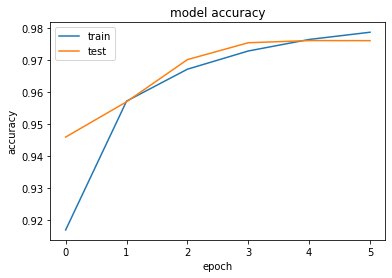

In [46]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

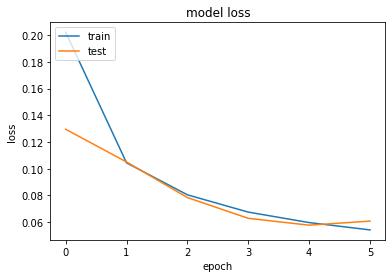

In [47]:
# summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
## classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     46433
           1       0.99      0.96      0.98     66922
           2       0.99      1.00      0.99     69871
           3       0.98      0.98      0.98     32571
           4       0.95      0.95      0.95     15038
           5       0.87      0.85      0.86      4526
           6       0.79      0.70      0.74      1512

    accuracy                           0.98    236873
   macro avg       0.93      0.92      0.92    236873
weighted avg       0.98      0.98      0.98    236873

